In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
import numpy as np

In [47]:
X = np.load('/content/X.npy')
Y = np.load('/content/Y.npy')

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
#veriseti hakkında bilgi sahibi olma
print(X_test.shape)
print(X_train.shape)
print(Y_train[:5])



(413, 64, 64)
(1649, 64, 64)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [49]:
# Model oluşturma
model = models.Sequential()

# Katmanları ekleme
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Tam bağlantılı katmanlar
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [50]:
# Model derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
47/47 [==============================] - 5s 100ms/step - loss: 2.2814 - accuracy: 0.1496 - val_loss: 2.0980 - val_accuracy: 0.2545
Epoch 2/10
47/47 [==============================] - 5s 105ms/step - loss: 1.3134 - accuracy: 0.5478 - val_loss: 0.8981 - val_accuracy: 0.6909
Epoch 3/10
47/47 [==============================] - 5s 97ms/step - loss: 0.7776 - accuracy: 0.7399 - val_loss: 0.6636 - val_accuracy: 0.7818
Epoch 4/10
47/47 [==============================] - 5s 105ms/step - loss: 0.5999 - accuracy: 0.8059 - val_loss: 0.6047 - val_accuracy: 0.8061
Epoch 5/10
47/47 [==============================] - 5s 97ms/step - loss: 0.4981 - accuracy: 0.8369 - val_loss: 0.6208 - val_accuracy: 0.8061
Epoch 6/10
47/47 [==============================] - 5s 103ms/step - loss: 0.3895 - accuracy: 0.8854 - val_loss: 0.4563 - val_accuracy: 0.8545
Epoch 7/10
47/47 [==============================] - 5s 100ms/step - loss: 0.2736 - accuracy: 0.9171 - val_loss: 0.5223 - val_accuracy: 0.8485
Epoch 8/

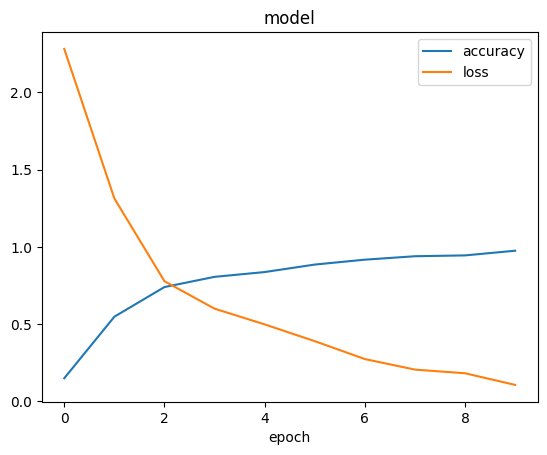

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model")
plt.xlabel("epoch")
plt.legend(["accuracy","loss"])

In [53]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

13/13 [==============================] - 0s 28ms/step - loss: 0.3560 - accuracy: 0.9031
0.9031476974487305


In [54]:
y_pred = model.predict(X_test)
y_pred[:3]


13/13 [==============================] - 0s 27ms/step


array([[3.4396626e-06, 1.0203494e-08, 5.7630107e-02, 6.9900349e-02,
        1.6549827e-10, 1.1121594e-07, 8.7246507e-01, 2.4357011e-10,
        8.2080481e-07, 2.2817328e-09],
       [3.9247290e-05, 9.0410573e-08, 8.8400138e-06, 4.3094646e-05,
        2.2055962e-12, 2.2065043e-09, 4.0337077e-04, 1.6570335e-05,
        4.5949686e-10, 9.9948877e-01],
       [2.7095821e-05, 8.7749111e-03, 5.5966148e-04, 9.4158208e-01,
        2.7936954e-07, 3.7262298e-03, 4.5164354e-02, 6.3061007e-06,
        9.8564931e-05, 6.0485909e-05]], dtype=float32)

In [55]:
Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)


[6, 9, 3, 9, 0, 0, 8, 2, 5, 6, 4, 9, 7, 1, 6, 3, 0, 5, 0, 7, 0, 2, 3, 6, 9, 2, 7, 3, 5, 9, 8, 5, 4, 6, 4, 6, 3, 1, 9, 2, 7, 8, 3, 1, 1, 2, 5, 7, 8, 9, 1, 9, 6, 2, 1, 0, 6, 8, 2, 8, 2, 7, 2, 7, 5, 9, 2, 2, 6, 4, 1, 1, 2, 7, 4, 9, 9, 4, 3, 8, 2, 9, 2, 0, 6, 0, 0, 4, 1, 2, 5, 5, 7, 4, 7, 4, 2, 2, 8, 7, 2, 0, 9, 0, 2, 1, 7, 8, 8, 7, 5, 3, 3, 3, 2, 6, 6, 1, 2, 5, 5, 0, 1, 5, 8, 2, 6, 5, 1, 0, 3, 1, 9, 9, 8, 3, 8, 9, 2, 2, 2, 6, 2, 6, 6, 1, 2, 2, 5, 4, 9, 2, 1, 2, 6, 2, 6, 6, 1, 1, 7, 2, 9, 8, 6, 2, 4, 7, 6, 6, 3, 8, 2, 9, 1, 6, 7, 6, 0, 6, 1, 7, 4, 8, 1, 6, 2, 2, 4, 2, 8, 6, 8, 3, 2, 0, 8, 8, 8, 5, 4, 7, 0, 2, 2, 4, 2, 5, 2, 8, 9, 0, 2, 8, 5, 3, 1, 3, 5, 0, 6, 4, 6, 1, 7, 5, 4, 1, 6, 5, 8, 4, 7, 6, 2, 1, 5, 4, 6, 4, 9, 6, 1, 0, 9, 0, 1, 2, 3, 9, 5, 4, 2, 0, 0, 4, 2, 5, 9, 2, 4, 7, 9, 8, 3, 7, 3, 7, 7, 1, 1, 1, 8, 9, 2, 7, 7, 3, 6, 7, 5, 3, 6, 9, 1, 9, 2, 9, 8, 3, 0, 7, 0, 8, 0, 6, 5, 2, 1, 0, 0, 3, 3, 3, 8, 3, 2, 9, 6, 9, 6, 6, 1, 9, 9, 4, 6, 3, 0, 5, 5, 8, 0, 0, 1, 2, 8, 9, 3, 1, 0, 4, 1, 

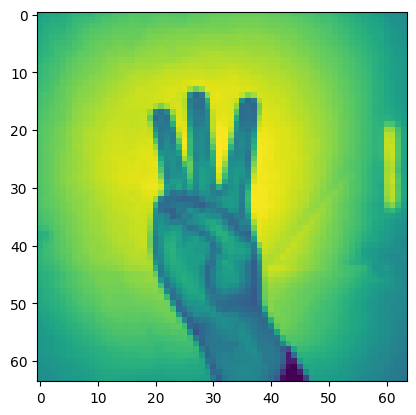

1/1 [==============================] - 0s 16ms/step
Tahmin Edilen Sınıf: 3
Gerçek Etiket: 3


In [59]:
plt.imshow(X_test[2])
plt.show()
# Modelin tahminini al
tahmin = model.predict(np.expand_dims(X_test[2], axis=0))[0]

# Modelin tahmin ettiği sınıf endeksi
tahmin_sınıf = np.argmax(tahmin)

# Gerçek etiketi al
gerçek_etiket = np.argmax(Y_test[2])
# Tahmin edilen ve gerçek sınıfı ekrana yazdırma
print(f'Tahmin Edilen Sınıf: {tahmin_sınıf}')
print(f'Gerçek Etiket: {gerçek_etiket}')